# Confronto Insertion Sort vs Quicksort

- [Conclusione](#conclusione)

Questa sezione confronta sperimentalmente gli algoritmi di ordinamento Insertion Sort e Quicksort sui casi migliore e peggiore (con liste costruite ad-hoc) e su dataset randomici per poi calcolarne la media dei tempi al crescere del numero di elementi del dataset. 
Verranno mostrati tempi di esecuzione e grafici che aiutano a confrontare le complessità teoriche con i risultati pratici.

In [ ]:
import time, random, math
# INSERTION #
def insertion_sort(a):
    # in-place
    for i in range(1, len(a)):
        key = a[i]
        j = i - 1
        while j >= 0 and a[j] > key:
            a[j+1] = a[j]
            j -= 1
        a[j+1] = key
    return a
#############

# QUICKSORT #
def partition(arr, l, r):
        pivot = arr[r] # il pivot è sempre l'ultimo elemento dell' array/sottoarray
        i = l - 1
        for j in range(l, r):
            if arr[j] <= pivot:
                i += 1
                arr[i], arr[j] = arr[j], arr[i] # swap elementi nella scrittura di python, arr[i+1] <=> arr[r]
        arr[i+1], arr[r] = arr[r], arr[i+1]
        return i+1
def quicksort(a, p=0, r=None):
    if r is None: # nel caso volessi ordinare una porzione, altrimenti ordina tutto l'array essendo r l'ultimo elemento
        r = len(a)-1
    if p < r:
        q = partition(a, p, r)
        quicksort(a, p, q-1)
        quicksort(a, q+1, r)
    return a
#############

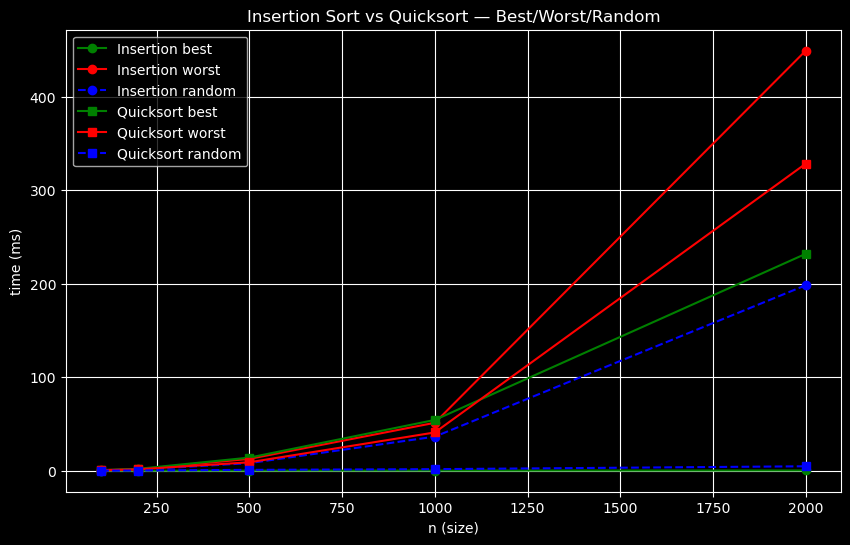

,ins_best_ms,ins_worst_ms,ins_rand_ms,qs_best_ms,qs_worst_ms,qs_rand_ms
n,,,,,,
100,0.0120,0.7047,0.248250,0.5828,0.3875,0.115650
200,0.0177,1.5622,1.105600,2.0408,1.5535,0.243225
500,0.0900,12.6694,8.133725,14.0476,9.0365,0.932350
1000,0.1345,51.2807,36.455150,54.3120,40.9386,1.678900
2000,0.2566,449.0609,198.294825,231.8930,328.2770,4.764800


In [ ]:
# Benchmark: casi migliore/peggiore e random
import numpy as np
import matplotlib.pyplot as plt

# helper timing function
from time import perf_counter as now

def time_func(fn, arr):
    a = arr.copy()
    t0 = now()
    fn(a)
    t1 = now()
    return (t1 - t0) * 1000  # ms

sizes = [100, 200, 500, 1000, 2000] # dimensioni dei 5 dataset, aggiungere a piacimento

results = {
    "insertion": [],
    "quicksort": []
}

for n in sizes:
    # Caso migliore insertion -> array già ordinato
    arr_best = list(range(n))
    t_ins_best = time_func(insertion_sort, arr_best)
    t_qs_best = time_func(quicksort, arr_best)

    # Caso peggiore insertion -> array inversamente ordinato
    arr_worst = list(range(n, 0, -1)) # step = -1 così va al contrario
    t_ins_worst = time_func(insertion_sort, arr_worst)
    t_qs_worst = time_func(quicksort, arr_worst)

    # Caso random media su k ripetizioni
    k = 5
    t_ins_rand = 0.0
    t_qs_rand = 0.0
    for k in range(k):
        r = random.sample(range(0, n*3), n)
        t_ins_rand += time_func(insertion_sort, r)
        t_qs_rand += time_func(quicksort, r)
    t_ins_rand /= k
    t_qs_rand /= k

    results['insertion'].append((t_ins_best, t_ins_worst, t_ins_rand))
    results['quicksort'].append((t_qs_best, t_qs_worst, t_qs_rand))

# grafici
sizes_arr = np.array(sizes)
ins_best = np.array([x[0] for x in results['insertion']])
ins_worst = np.array([x[1] for x in results['insertion']])
ins_rand = np.array([x[2] for x in results['insertion']])
qs_best = np.array([x[0] for x in results['quicksort']])
qs_worst = np.array([x[1] for x in results['quicksort']])
qs_rand = np.array([x[2] for x in results['quicksort']])

plt.style.use("dark_background")

plt.figure(figsize=(10,6))
plt.plot(sizes_arr, ins_best, 'g-o', label='Insertion best')
plt.plot(sizes_arr, ins_worst, 'r-o', label='Insertion worst')
plt.plot(sizes_arr, ins_rand, 'b--o', label='Insertion random')

plt.plot(sizes_arr, qs_best, 'g-s', label='Quicksort best')
plt.plot(sizes_arr, qs_worst, 'r-s', label='Quicksort worst')
plt.plot(sizes_arr, qs_rand, 'b--s', label='Quicksort random')

plt.xlabel('n (size)')
plt.ylabel('time (ms)')
plt.title('Insertion Sort vs Quicksort — Best/Worst/Random')
plt.legend()
plt.grid(True)
plt.show()

# stampa della tabella dei tempi per ogni dataset
import pandas as pd
rows = []
for i, n in enumerate(sizes):
    rows.append({
        'n': n,
        'insertion migliore ms': ins_best[i],
        'insertion peggiore ms': ins_worst[i],
        'insertion randomico (media) ms': ins_rand[i],
        'quicksort migliore ms': qs_best[i],
        'quicksort peggiore ms': qs_worst[i],
        'quicksort randomico (media) ms': qs_rand[i],
    })

pd.DataFrame(rows).set_index('n')


## Conclusione

- Complessità teoriche:
  - Insertion Sort: best $ O(n) $ (già ordinato), worst $ O(n^2) $ (inverso), average $ O(n^2) $.
  - Quicksort (pivot come ultimo elemento): best $ O(n \log n) $ (partizionamenti bilanciati), worst $ O(n^2) $ ovvero array già ordinato, average $ O(n \log n) $.

- Cosa aspettarsi nei grafici:
  - Insertion Sort mostrerà tempi molto bassi nel caso best $ O(n) $ (array già ordinato) e una crescita quadratica nel worst/random per $ n $ grandi.
  - Quicksort mostrerà comportamento vicino a $ O(n \log n) $ per random e, con la scelta pivot come ultimo elemento, può degradare a $ O(n^2) $ esattamente come insertionsort su array già ordinati sia in ordine crescente che decrescente -> in questo modo i sottoarray per la ricorsione sono sbilanciato poiché prendendo come pivot l'ultimo elemento avremo un sottoarrai sinistro pieno e destro vuoto se l'array è già ordinato in modo crescente, mentre l'opposto se in modo decrescente (meglio usare pivot casuale così da ottenere un valore atteso del costo $ O(n \log n) $).

- Suggerimenti sperimentali:
  - Per misure più accurate aumentare le dimensioni dei dataset e ripetere più volte; usare la mediana sui ripetuti per ogni n.